# City Search Tool

There are a lot of factors that go into making a big move, and for many people, the top priority is either their job or their family. But if you’re on your own and you have job flexibility to go basically wherever you want (i.e. you work remotely), then what? In that case, you have the luxury of finding a place that suits you—and not necessarily just your career.

A myriad of decisions go into picking the perfect place to call home — political leanings, crime rates, walkability, affordability, religious affiliations, weather and more — can you make a tool that allows aggie graduates and others to find thier next move?

[High speed internet](https://www.highspeedinternet.com/best-cities-to-live-work-remotely) (of all people?!) made a tool to do this.... but you can do better! Think of more factors: like median income of a location, cuisine, primary ethnicity, pollution index, happiness index, number of coffee shops or microbreweries in the city, etc. There's no end! Furthermore, maybe you are an international student and want to make this tool for global placement! Go for it! Maybe you want to penalize distance from POI's (points of interest) like family. Do it! The world is your oyster!

#### Starter Datasets
- [MoveHub City Ratings](https://www.kaggle.com/blitzr/movehub-city-rankings?select=movehubqualityoflife.csv)
  - [Notebooks for ideas on how to use data](https://www.kaggle.com/blitzr/movehub-city-rankings/notebooks)
- [World City Populations](https://www.kaggle.com/max-mind/world-cities-database?select=worldcitiespop.csv)
- [Rental Price](https://www.kaggle.com/zillow/rent-index)

#### Where to Find More Data
- [Google Datasets](https://datasetsearch.research.google.com/)
- [US Census](https://data.census.gov/cedsci/?q=United%20States)
- [Kaggle Datasets](https://www.kaggle.com/datasets)


#### How We Judge
- *Data Use*: Effectively used data, acquired additional data
- *Analytics*: Effective application of analytics (bonus points for ML/clustering techniques)
- *Visualization*: Solution is visually appealing and useful (Bonus points if you create an interactive tool/ application/ website)
- *Impact*: Clear impact of solution to solving problem

#### Helpful Workshops
- Intro to Python: Sat, 10:30-12:00
- Statistics for Data Scientists: Sat, 10:30-12:00
- How to Win TAMU Datathon: Sat, 13:00-14:00
- Data Wrangling: Sat, 17:00-18:15
- Data Visualization: Sat, 18:30-19:45
- Machine Learning Part 1 - Theory: Sat, 20:00-21:15
- Machine Learning Part 2 - Applied: Sat, 21:30-22:45


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [115]:
from sklearn.metrics import mean_absolute_error 

In [95]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [2]:
!pip install geopy

In [3]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2


In [4]:
import pycountry

In [5]:
!pip install pycountry-convert

In [6]:
from geopy.geocoders import Nominatim

In [7]:
geolocator = Nominatim(user_agent="city_search")

In [8]:
# an example of using geopy
location = geolocator.reverse("52.509669, 13.376294")
location

Location(Steinecke, Potsdamer Platz, Tiergarten, Mitte, Berlin, 10785, Deutschland, (52.5098134, 13.37631790998454, 0.0))

In [9]:
location = geolocator.reverse("29.4241219,-98.4936282")
location

Location(Downtown, San Antonio, Bexar County, Texas, United States of America, (29.423991049999998, -98.49349943787996, 0.0))

In [84]:
# a toy example of finding the continent of a region
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)


In [109]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [121]:
import statsmodels.api as sm
def LineReg(target, source):
  results = sm.OLS(target,source).fit()
  return results, results.summary()  

In [122]:
r1, s1 = LineReg(df2["Movehub Rating"], df2["Purchase Power"])
s1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Movehub Rating   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              1594.
Date:                Sat, 17 Oct 2020   Prob (F-statistic):                   2.14e-101
Time:                        22:08:57   Log-Likelihood:                         -1022.8
No. Observations:                 216   AIC:                                      2048.
Df Residuals:                     215   BIC:                                      2051.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Purchase Power     1.4764      0.037     39.923      0.000       1.404       1.549
==============================================================================
Omnibus:                       26.652   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.123
Skew:                          -0.280   Prob(JB):                      0.00633
Kurtosis:                       2.100   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's look at the R-squared value. Since the R-squared value is close to 1, we can conclude that our fit from linear model to the correlation between purchase power and Movehub rating well. We can say they are linear. As we can see from the F-statistics and P statistics, the null hypothesis can be rejected and we accept that our data gives a linear correlations on two entries.

Now, let's look at the entry of quality of life and movehub rating. We can see that we can accept the alternative hypothesis too.

In [123]:
r2, s2 = LineReg(df2["Movehub Rating"], df2["Quality of Life"])
r2

In [124]:
r2

TypeError: ignored

Now let's see how neural network can perform on the dataset.

In [ ]:
# get states
pycountry.subdivisions.get(country_code='US')

In [86]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?id=1hSMhl-JeTCX-t72KjhasTQoL1LdWSRhw')

In [13]:
df.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,lat,lng
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70,10.480594,-66.903606
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93,-26.204103,28.047305
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65,-3.732714,-38.526998
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13,38.627003,-90.199404
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86,19.432608,-99.133208


In [14]:
def map_one_row_for_getting_country_and_continent(row):
    longlat= str(row["lat"])+"," + str( row["lng"])
    location = geolocator.reverse(longlat)
    row["country_code"] = location.raw["address"]["country_code"]
    row["country"] = pycountry.countries.get(alpha_2=row["country_code"]).name
    row["continent"] = get_continent(row["country"])[1]
    return row
    #return pycountry.countries.get(alpha_2=location.raw[""]).name
df2 = df.apply(map_one_row_for_getting_country_and_continent, axis=1)

In [15]:
df2.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,lat,lng,country_code,country,continent
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70,10.480594,-66.903606,ve,"Venezuela, Bolivarian Republic of",SA
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93,-26.204103,28.047305,za,South Africa,AF
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65,-3.732714,-38.526998,br,Brazil,SA
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13,38.627003,-90.199404,us,United States,NA
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86,19.432608,-99.133208,mx,Mexico,NA


In [33]:
df2.to_csv("map.csv")

In [22]:
df_us = df2[df2.apply(lambda x: x["country_code"] == 'us', axis=1)]

In [30]:
def map_one_row_for_getting_state(row):
    longlat= str(row["lat"])+"," + str( row["lng"])
    location = geolocator.reverse(longlat)
    row["state"] = location.raw["address"]["state"]
    return row
df_us_2 = df_us.apply(map_one_row_for_getting_state, axis=1)

In [32]:
df_us_2.to_csv("USmap.csv")

In [34]:
df_us_2.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,lat,lng,country_code,country,continent,state
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13,38.627003,-90.199404,us,United States,NA,Missouri
5,Detroit,70.63,73.81,63.05,83.45,50.99,76.69,42.331427,-83.045754,us,United States,NA,Michigan
11,Las Vegas,84.88,80.46,66.52,59.73,60.50,70.57,36.169941,-115.139830,us,United States,NA,Nevada
13,Philadelphia,83.31,68.77,54.17,38.64,65.53,68.58,39.952584,-75.165222,us,United States,NA,Pennsylvania
19,Los Angeles,86.86,62.75,68.61,75.20,62.82,65.74,34.052234,-118.243685,us,United States,NA,California


In [57]:
f = open("label.txt", "r")
proc = f.read()

In [62]:
inputbuffer = proc.split('\n')

In [77]:
process = {"City":[], "Unemployment" : []}
for i in range(0, len(inputbuffer)):
  if 3*i >= len(inputbuffer):
    break
  cname = inputbuffer[3*i]
  cityname = ""
  for j in range(0,len(cname)):
    if  cname[j] == ',' or cname[j] == '-':
      break
    cityname += cname[j]
  rows = inputbuffer[3*i+2].split('\t')
  process["City"].append(cityname)
  process["Unemployment"].append(float(rows[0]))

In [78]:
cdf = pd.DataFrame(process)

In [79]:
cdf.to_csv("unemployment.csv", index=False)

In [36]:
df = pd.read_csv("income.csv", encoding = "ISO-8859-1")

In [38]:
df_income = df[["City", "Median", "Mean"]]

In [40]:
df_income = df_income.rename(columns={"Median": "Median Income", "Mean": "Mean Income"})

In [44]:
result = pd.merge(df_us_2, df_income, on='City', how='inner')

In [48]:
result = result.drop_duplicates(subset=['City'])


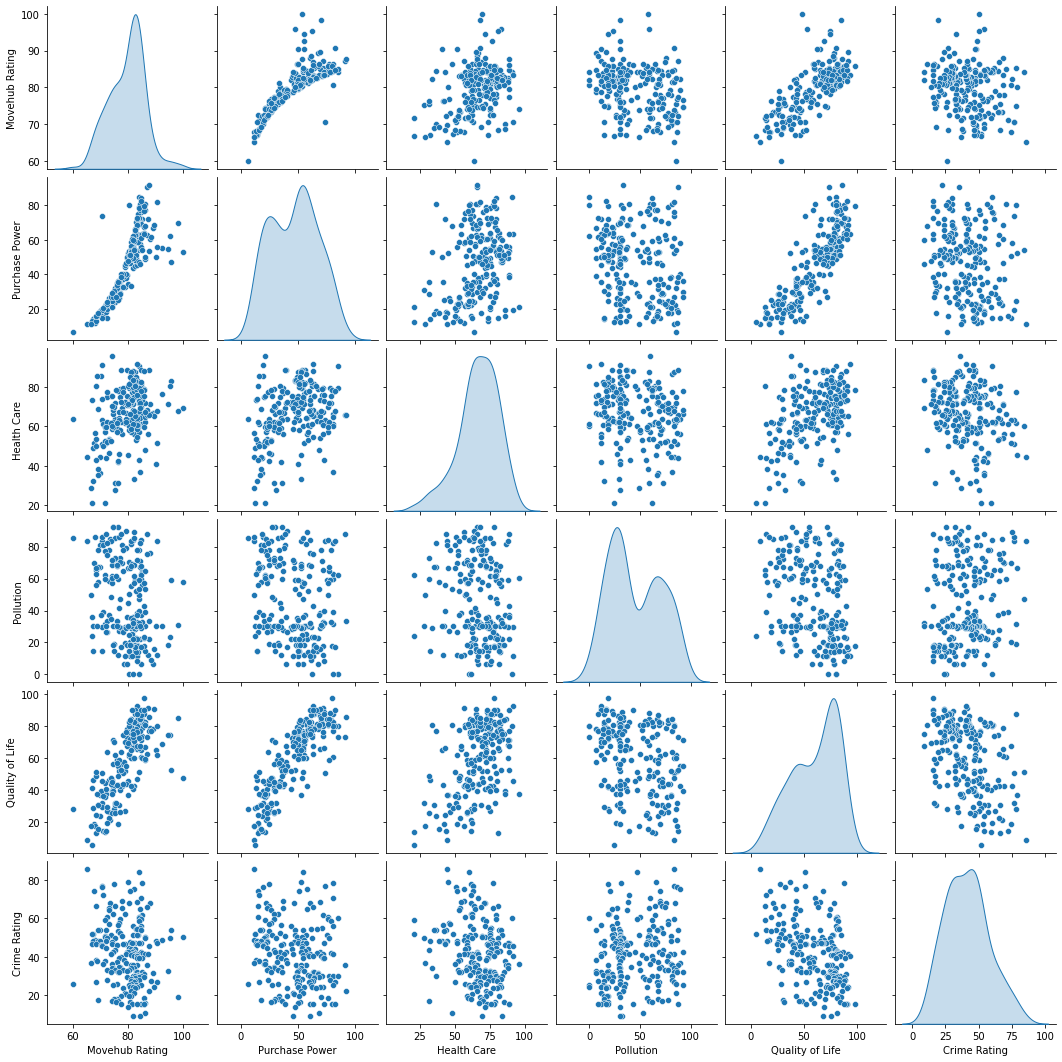

In [16]:
sns.pairplot(df[['Movehub Rating','Purchase Power', 'Health Care', 'Pollution', 'Quality of Life', 'Crime Rating']], diag_kind='kde')

In [51]:
def drawcorrelation(df, cols):
  selecteddf = df[cols]
  corr_matrix = selecteddf.corr()
  mask = np.zeros_like(corr_matrix, dtype=np.bool)
  mask[np.triu_indices_from(mask)]= True
  f, ax = plt.subplots(figsize=(11, 15))
  heatmap = sns.heatmap(corr_matrix,
                        mask = mask,
                        square = True,
                        linewidths = .5,
                        cmap = 'coolwarm',
                        cbar_kws = {'shrink': .4,
                                  'ticks' : [-1, -.5, 0, 0.5, 1]},
                        vmin = -1,
                        vmax = 1,
                        annot = True,
                        annot_kws = {"size": 12})

  #add the column names as labels
  ax.set_yticklabels(corr_matrix.columns, rotation = 0)
  ax.set_xticklabels(corr_matrix.columns)

  sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [17]:
# https://www.kdnuggets.com/2019/07/annotated-heatmaps-correlation-matrix.html
# preparing for correlation matrices
selecteddf = df[['Movehub Rating','Purchase Power', 'Health Care', 'Pollution', 'Quality of Life', 'Crime Rating']]
corr_matrix = selecteddf.corr()
corr_matrix

,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
Movehub Rating,1.000000,0.829614,0.366797,-0.271697,0.742073,-0.185205
Purchase Power,0.829614,1.000000,0.322705,-0.214931,0.844957,-0.185861
Health Care,0.366797,0.322705,1.000000,-0.161485,0.487651,-0.240162
Pollution,-0.271697,-0.214931,-0.161485,1.000000,-0.334963,0.175560
Quality of Life,0.742073,0.844957,0.487651,-0.334963,1.000000,-0.427064
Crime Rating,-0.185205,-0.185861,-0.240162,0.175560,-0.427064,1.000000


In [18]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

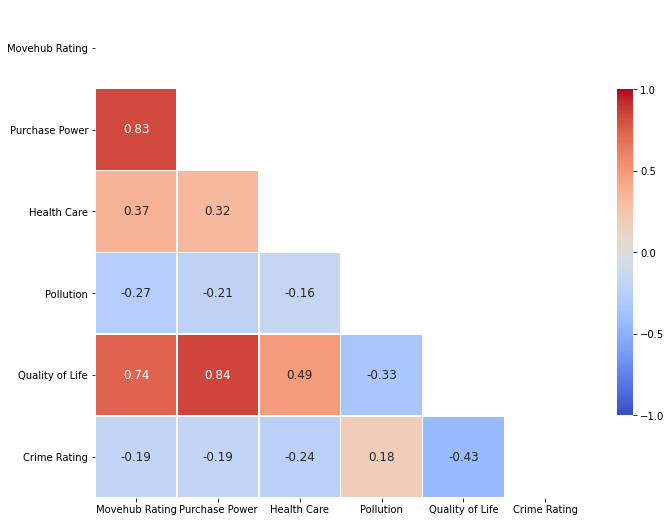

In [19]:
f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

As we can see from above, health care and pollution are slightly negatively correleated. And QoL is positively correlated with factors like purhcase power, healthcare. However, QoL is negatively correlated with pollution and crime.

By examing the pair plot, we can see that Movehub rating is almost linear compared with purchase power and quality of life. That brings up our approach to find the correlations between these variables. We want to find how linear regression will bring up the results for the correlations among the variables. 

And we will possibly use kernelized support vector machine or neural network to predict how Movehub rating relates with the other variables that are not linearly correlated. 

By using external data sources, there will be other interesting questions to ask: how does unemployment fuel the crime rates? How does median household income of a region determines purchasing power? (we have clearly shown that purchasing power is negatively correlated to crime rates) 

We will restrict our focus on these questions on a specific region. The region we want to exam is the United States. However, the analysis of these questions can be applicable to other regions in the world as well. Possibly, slight modifications are needed, due to a region's culture and custom.

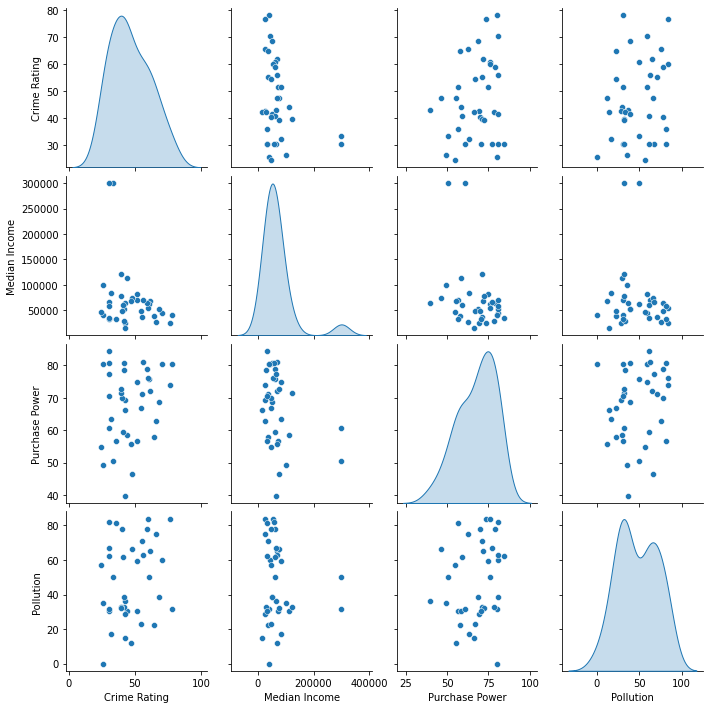

In [55]:
sns.pairplot(result[['Crime Rating', 'Median Income', 'Purchase Power', 'Pollution']], diag_kind='kde')

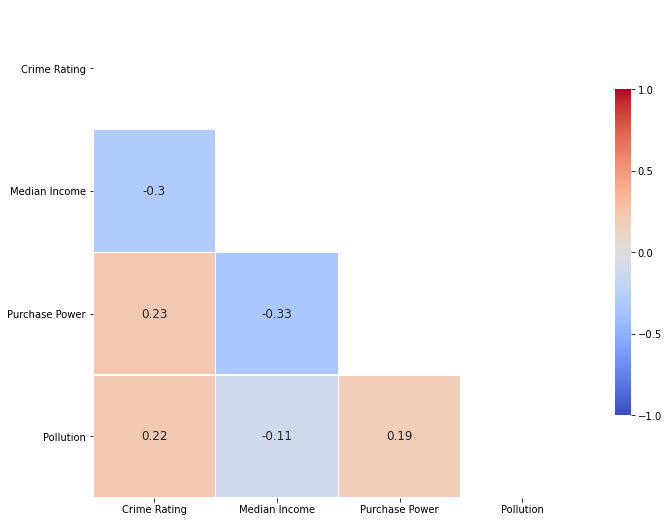

In [56]:
drawcorrelation(result, ["Crime Rating", "Median Income", 'Purchase Power', 'Pollution'])

As we can see here that median income has a negative correlation with pollution and with crime rates and purchasing power has a negative correlation with purchasing power, which is a little bit suprising.
But we do not exclude the possibility that our sample size was small, which contributes to the lack of data and spurious conclusion.

In [20]:
import plotly.express as px
# df = px.data.gapminder()
# fig = px.choropleth(df, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year", range_color=[20,80])
# fig.show()

In [80]:
res2 = pd.merge(df_us_2, cdf, on='City', how='inner')

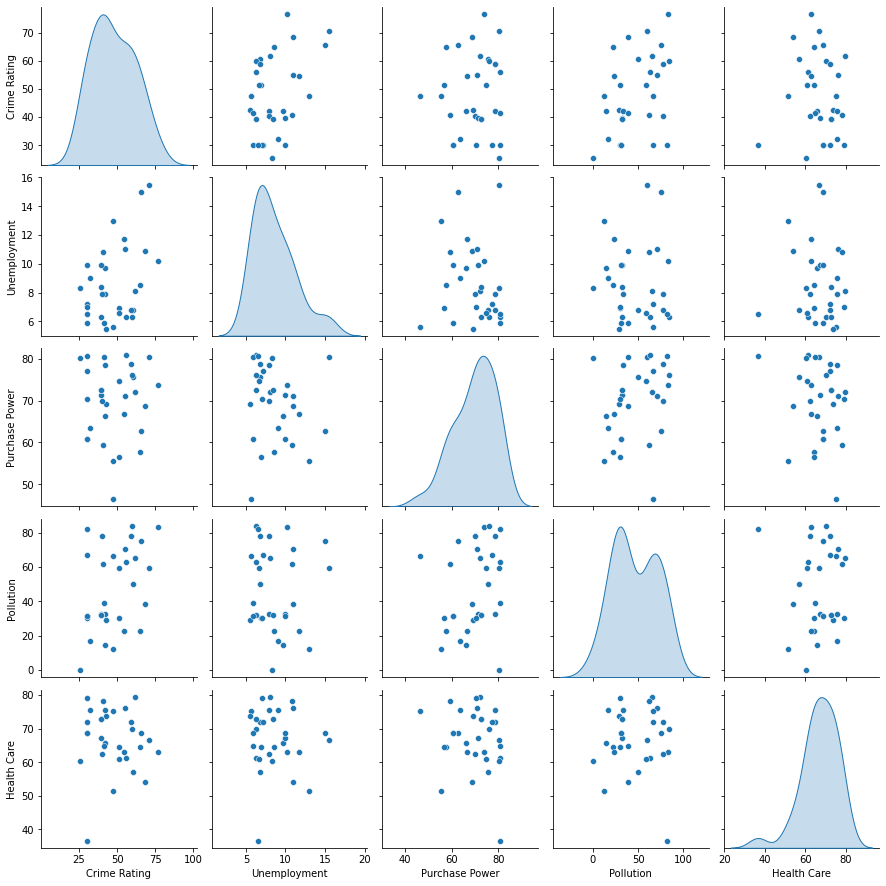

In [82]:
sns.pairplot(res2[['Crime Rating', 'Unemployment', 'Purchase Power', 'Pollution', "Health Care"]], diag_kind='kde')

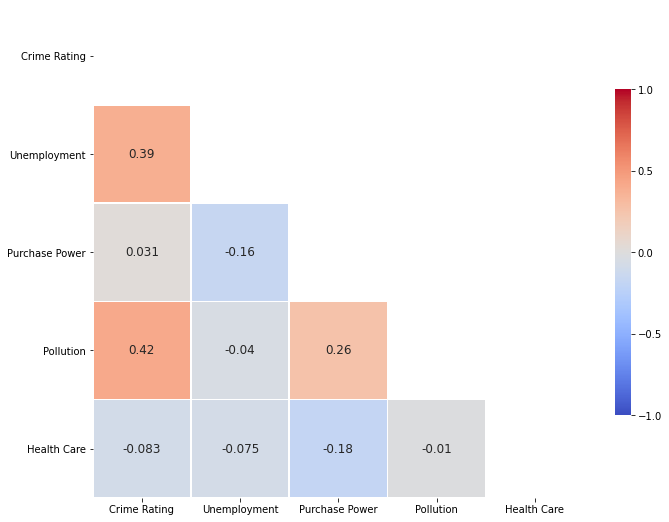

In [83]:
drawcorrelation(res2, ['Crime Rating', 'Unemployment', 'Purchase Power', 'Pollution', "Health Care"])

As we can see above that unemployment has a negative correlation with purchasing power. It's because people who are unemployed will tend to buy less stuff. There is also a negative correlation between unemployment and pollution as we can see here. It's because if people are unemployed, they  will buy less gas. They will use mass transport, which helps curb the pollution. In regarding to healthcare, though we do see a negative correlation between healthcare and unemployment. But it's what we expected. The negative correlation is small, which means the social programs in the US are well-funded. Even if people are unemployed, they are still able to get decent healthcare.

In this section, we will use the population of the world as an example and we will use linear regression for the correlations between Movehub rating and quality of life/  Movehub rating  and purchasing power. And we will further use neural network to predict Movehub rating with regards to other variables in the world.  


In [102]:
train = df2[['Health Care', 'Pollution', 'Crime Rating']]
target = df2["Movehub Rating"]

In [106]:
NN_model = Sequential()
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [107]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                64        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

In [116]:
predicted_target = NN_model.predict(train)
MAE = mean_absolute_error(predicted_target , target)
print('Training error = ', MAE)

Training error =  5.255833908363625


In [131]:
train2 = train.copy().iloc[:1]

In [158]:
train2.iloc[0]["Health Care"] = 100
train2.iloc[0]["Pollution"] = 0
train2.iloc[0]["Crime Rating"] = 0
predicted_target = NN_model.predict(train2)
print("assume we have everything good : " + str(predicted_target))

train2.iloc[0]["Health Care"] = 100
train2.iloc[0]["Pollution"] = 0
train2.iloc[0]["Crime Rating"] = 60
predicted_target = NN_model.predict(train2)
print("If we increase the crime rate, we will have : " + str(predicted_target))

train2.iloc[0]["Health Care"] = 100
train2.iloc[0]["Pollution"] = 60
train2.iloc[0]["Crime Rating"] = 0
predicted_target = NN_model.predict(train2)
print("If we increase the pollution rate, we will have : " + str(predicted_target))
print("polution plays a higher significance than crime rates.")

train2.iloc[0]["Health Care"] = 0
train2.iloc[0]["Pollution"] = 0
train2.iloc[0]["Crime Rating"] = 0
predicted_target = NN_model.predict(train2)
print("What about healthcare? : " + str(predicted_target))
print("As we can see that a sick city is not a good city for people to move to.")


assume we have everything good : [[95.339226]]
If we increase the crime rate, we will have : [[94.20081]]
If we increase the pollution rate, we will have : [[93.9818]]
polution plays a higher significance than crime rates.
What about healthcare? : [[45.392403]]
As we can see that a sick city is not a good city for people to move to.


array([[76.264946]], dtype=float32)

In [117]:
#@title Rate importance of each of the following factors


movehub_rating = "Low" #@param ["None", "Low", "Med", "High"]
purchase_power = "High" #@param ["None", "Low", "Med", "High"]
health_care = "Med" #@param ["None", "Low", "Med", "High"]
quality_of_life = "High" #@param ["None", "Low", "Med", "High"]
pollution = "Low" #@param ["None", "Low", "Med", "High"]
crime_rating = "Low" #@param ["None", "Low", "Med", "High"]

import numpy as np

weights = [
  movehub_rating,
  purchase_power,
  health_care,
  quality_of_life,
  pollution,
  crime_rating,
]
replace = {'None': 0, 'Low': 1, 'Med': 2, 'High': 3}
weights = np.array([replace[x] for x in weights])
weights *= [1, 1, 1, 1, -1, -1]

features = ['Movehub Rating', 'Purchase Power', 'Health Care', 'Quality of Life', 'Pollution', 'Crime Rating']
norm = lambda xs: (xs-xs.min())/(xs.max()-xs.min())
# we will use our model to compute the scores
df['Score'] = norm(df[features].dot(weights))*10

fig = px.scatter_mapbox(df.sort_values('Score', ascending=False).round(),
                        lat="lat", lon="lng", color="Score", hover_name="City",
                        hover_data=features,
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                        mapbox_style="carto-positron")
fig.show()

df.sort_values('Score', ascending=False)[['City', 'Score'] + features].round()

,City,Score,Movehub Rating,Purchase Power,Health Care,Quality of Life,Pollution,Crime Rating
207,Zurich,10.0,86.0,80.0,78.0,98.0,18.0,15.0
209,Dresden,10.0,85.0,83.0,78.0,90.0,17.0,15.0
188,Ottawa,9.0,88.0,92.0,66.0,86.0,34.0,22.0
29,Glasgow,9.0,84.0,85.0,91.0,80.0,0.0,60.0
211,Dusseldorf,9.0,83.0,73.0,76.0,88.0,9.0,15.0
...,...,...,...,...,...,...,...,...
124,Baku,1.0,66.0,11.0,29.0,17.0,49.0,37.0
43,Tehran,1.0,72.0,18.0,44.0,14.0,88.0,54.0
32,Dhaka,1.0,72.0,21.0,21.0,13.0,62.0,59.0
50,Hanoi,1.0,67.0,12.0,21.0,5.0,24.0,52.0


[Maps with express](https://plotly.com/python/plotly-express/#maps)

# Host On Web App?
Show us all you got by building a dashboard webapp in Python at
[streamlit.io](https://www.streamlit.io/)!